# Loading and Preparing the Dataset

In [4]:
import pandas as pd
bank_df=pd.read_csv("bank.csv")
bank_df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [9]:
X_features=list(bank_df.columns)
X_features.remove('y')
X_features.remove('contact')
X_features.remove('day')
X_features.remove('month')
X_features.remove('duration')
X_features.remove('pdays')
X_features.remove('poutcome')
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'campaign',
 'previous']

In [10]:
encoded_bank_df=pd.get_dummies(bank_df[X_features],drop_first=True)

In [11]:
Y=bank_df.y.map(lambda x : int(x=='yes'))
X=encoded_bank_df

# Building the Logistic Regression Model

In [13]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,sm.add_constant(X)).fit()

Optimization terminated successfully.
         Current function value: 0.335572
         Iterations 7


C:\Users\windows\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.061     
Dependent Variable:   y                AIC:              3082.2384 
Date:                 2022-08-04 18:11 BIC:              3236.2341 
No. Observations:     4521             Log-Likelihood:   -1517.1   
Df Model:             23               LL-Null:          -1615.5   
Df Residuals:         4497             LLR p-value:      1.4866e-29
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const               -1.7573   0.3799 -4.6251 0.0000 -2.5019 -1.0126
age                  0.0078   0.0058  1.3395 0.1804 -0.0036  0.0191
balance             -0.0000   0.0000 -0.2236 0.8231 -0.0000  0.0000
campaign            -0.0905   0.0238 -3.8042 0.0001 -0.1371 -0.0439
previous             0.1414   0.0212  6.6569 0.0000  0.0998  0.1830
job_blue-collar     -0.3412   0.2000 -1.7060 0.0880 -0.7331  0.0508
job_entrepreneur    -0.2900   0.3161 -0.9175 0.3589 -0.9096  0.3295
job_housemaid       -0.0166   0.3339 -0.0497 0.9603 -0.6711  0.6379
job_management      -0.0487   0.1984 -0.2455 0.8061 -0.4375  0.3401
job_retired          0.5454   0.2503  2.1794 0.0293  0.0549  1.0360
job_self-employed   -0.2234   0.2895 -0.7715 0.4404 -0.7909  0.3441
job_services        -0.2248   0.2245 -1.0012 0.3167 -0.6648  0.2152
job_student          0.3888   0.3181  1.2223 0.2216 -0.2346  1.0122
job_technician      -0.2101   0.1874 -1.1213 0.2622 -0.5773  0.1571
job_unemployed      -0.3723   0.3336 -1.1162 0.2643 -1.0261  0.2815
job_unknown          0.3193   0.4620  0.6913 0.4894 -0.5861  1.2248
marital_married     -0.4012   0.1440 -2.7857 0.0053 -0.6835 -0.1189
marital_single      -0.0463   0.1676 -0.2763 0.7823 -0.3749  0.2822
education_secondary  0.2128   0.1680  1.2670 0.2052 -0.1164  0.5420
education_tertiary   0.3891   0.1935  2.0103 0.0444  0.0098  0.7684
education_unknown   -0.1956   0.2927 -0.6682 0.5040 -0.7693  0.3781
default_yes          0.2286   0.3670  0.6228 0.5334 -0.4908  0.9479
housing_yes         -0.5355   0.1024 -5.2273 0.0000 -0.7362 -0.3347
loan_yes            -0.7139   0.1689 -4.2268 0.0000 -1.0449 -0.3829
===================================================================

"""

In [17]:

# For significant variables - p value<=0.05
def get_significant_vars(lm):
    var_p_vals_df=pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars']=var_p_vals_df.index
    var_p_vals_df.columns=['pvals','vars']
    return list(var_p_vals_df[var_p_vals_df.pvals<=0.05]['vars'])


significant_vars=get_significant_vars(logit_model)
significant_vars

['const',
 'campaign',
 'previous',
 'job_retired',
 'marital_married',
 'education_tertiary',
 'housing_yes',
 'loan_yes']

In [19]:
X_features=[
 'campaign',
 'previous',
 'job_retired',
 'marital_married',
 'education_tertiary',
 'housing_yes',
 'loan_yes']

In [22]:
logit_model_2=sm.Logit(Y,sm.add_constant(X[X_features])).fit()

Optimization terminated successfully.
         Current function value: 0.337228
         Iterations 7


In [23]:
logit_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.056     
Dependent Variable:   y                AIC:              3065.2182 
Date:                 2022-08-04 18:20 BIC:              3116.5501 
No. Observations:     4521             Log-Likelihood:   -1524.6   
Df Model:             7                LL-Null:          -1615.5   
Df Residuals:         4513             LLR p-value:      8.1892e-36
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const              -1.4754   0.1133 -13.0260 0.0000 -1.6974 -1.2534
campaign           -0.0893   0.0236  -3.7925 0.0001 -0.1355 -0.0432
previous            0.1419   0.0211   6.7097 0.0000  0.1004  0.1833
job_retired         0.8246   0.1731   4.7628 0.0000  0.4853  1.1639
marital_married    -0.3767   0.0969  -3.8878 0.0001 -0.5667 -0.1868
education_tertiary  0.2991   0.1014   2.9500 0.0032  0.1004  0.4978
housing_yes        -0.5834   0.0986  -5.9179 0.0000 -0.7767 -0.3902
loan_yes           -0.7025   0.1672  -4.2012 0.0000 -1.0302 -0.3748
===================================================================

"""

In [24]:
y_pred_df=pd.DataFrame({'actual':Y,'predicted_prob':logit_model_2.predict(sm.add_constant(X[X_features]))})

C:\Users\windows\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [25]:
sorted_predict_df=y_pred_df[['predicted_prob','actual']].sort_values('predicted_prob',ascending=False)

In [27]:
num_per_decile=int(len(sorted_predict_df)/10)
print("Number of observations per decile:",num_per_decile)

Number of observations per decile: 452


In [28]:
def get_deciles(df):
    #set first decile
    df['decile']=1
    
    idx=0
    #Iterate through all the 10 deciles
    for each_d in range(0,10):
        #Setting each 452 observtions to one decile in sequence 
        df.iloc[idx:idx+num_per_decile, df.columns.get_loc('decile')]=each_d
        idx+=num_per_decile
        
    df['decile']=df['decile']+1
    
    return df

In [29]:
deciles_predict_df=get_deciles(sorted_predict_df)

In [30]:
deciles_predict_df[0:10]

,predicted_prob,actual,decile
3682,0.864769,0,1
97,0.828031,0,1
3426,0.706809,0,1
1312,0.642337,1,1
3930,0.631032,1,1
4397,0.619146,0,1
2070,0.609129,0,1
3023,0.573199,0,1
4080,0.572364,0,1
804,0.559350,0,1


In [31]:
#Calculation Gain

gain_lift_df=pd.DataFrame(deciles_predict_df.groupby('decile')['actual'].sum()).reset_index()
gain_lift_df.columns=['decile','gain']

In [32]:
gain_lift_df['gain_percentage']=(100*gain_lift_df.gain.cumsum()/gain_lift_df.gain.sum())

In [33]:
gain_lift_df

,decile,gain,gain_percentage
0,1,125,23.992322
1,2,83,39.923225
2,3,73,53.934741
3,4,53,64.107486
4,5,31,70.057582
5,6,46,78.886756
6,7,37,85.988484
7,8,28,91.362764
8,9,25,96.161228
9,10,20,100.000000


In [36]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

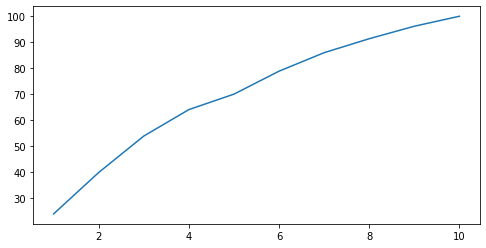

In [37]:
plt.figure(figsize=(8,4))
plt.plot(gain_lift_df['decile'],gain_lift_df['gain_percentage'],'-')

plt.show()

In [39]:
#Calculating Lift
gain_lift_df['lift']=(gain_lift_df.gain_percentage/(gain_lift_df.decile*10))

gain_lift_df

,decile,gain,gain_percentage,lift
0,1,125,23.992322,2.399232
1,2,83,39.923225,1.996161
2,3,73,53.934741,1.797825
3,4,53,64.107486,1.602687
4,5,31,70.057582,1.401152
5,6,46,78.886756,1.314779
6,7,37,85.988484,1.228407
7,8,28,91.362764,1.142035
8,9,25,96.161228,1.068458
9,10,20,100.000000,1.000000


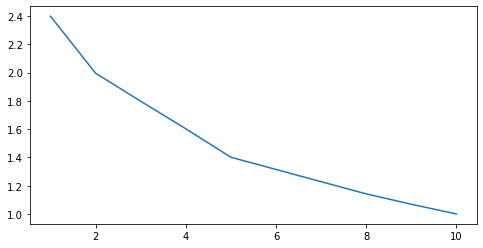

In [40]:
plt.figure(figsize=(8,4))
plt.plot(gain_lift_df['decile'],gain_lift_df['lift'],'-')
plt.show()